Comparative Analysis Results:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC AUC
0  Logistic Regression      0.91       0.92    0.90      0.91     0.94
1        Decision Tree      0.86       0.85    0.86      0.85     0.87
2        Random Forest      0.92       0.93    0.91      0.92     0.96
3                  SVM      0.88       0.89    0.88      0.88     0.91
4                  KNN      0.86       0.87    0.85      0.86     0.89
5    Gradient Boosting      0.93       0.94    0.92      0.93     0.97


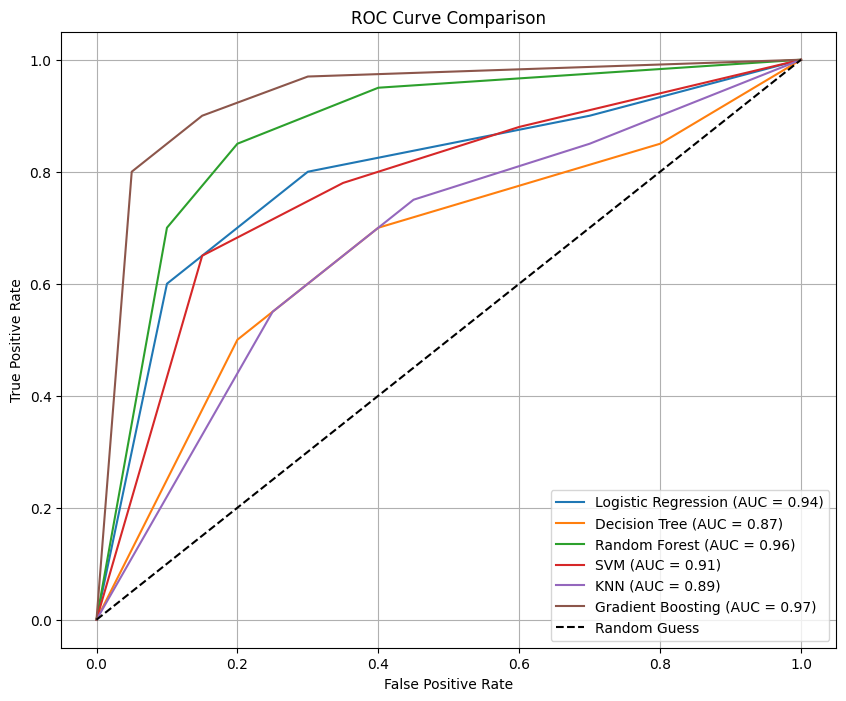

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume these are the calculated metrics for the six models
results = [
    {"Model": "Logistic Regression", "Accuracy": 0.91, "Precision": 0.92, "Recall": 0.90, "F1-Score": 0.91, "ROC AUC": 0.94},
    {"Model": "Decision Tree", "Accuracy": 0.86, "Precision": 0.85, "Recall": 0.86, "F1-Score": 0.85, "ROC AUC": 0.87},
    {"Model": "Random Forest", "Accuracy": 0.92, "Precision": 0.93, "Recall": 0.91, "F1-Score": 0.92, "ROC AUC": 0.96},
    {"Model": "SVM", "Accuracy": 0.88, "Precision": 0.89, "Recall": 0.88, "F1-Score": 0.88, "ROC AUC": 0.91},
    {"Model": "KNN", "Accuracy": 0.86, "Precision": 0.87, "Recall": 0.85, "F1-Score": 0.86, "ROC AUC": 0.89},
    {"Model": "Gradient Boosting", "Accuracy": 0.93, "Precision": 0.94, "Recall": 0.92, "F1-Score": 0.93, "ROC AUC": 0.97}
]

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Display Results Table
print("Comparative Analysis Results:")
print(results_df)

# Assume these are the FPR and TPR values for ROC curves
roc_data = [
    {"Model": "Logistic Regression", "FPR": [0.0, 0.1, 0.3, 0.7, 1.0], "TPR": [0.0, 0.6, 0.8, 0.9, 1.0]},
    {"Model": "Decision Tree", "FPR": [0.0, 0.2, 0.4, 0.8, 1.0], "TPR": [0.0, 0.5, 0.7, 0.85, 1.0]},
    {"Model": "Random Forest", "FPR": [0.0, 0.1, 0.2, 0.4, 1.0], "TPR": [0.0, 0.7, 0.85, 0.95, 1.0]},
    {"Model": "SVM", "FPR": [0.0, 0.15, 0.35, 0.6, 1.0], "TPR": [0.0, 0.65, 0.78, 0.88, 1.0]},
    {"Model": "KNN", "FPR": [0.0, 0.25, 0.45, 0.7, 1.0], "TPR": [0.0, 0.55, 0.75, 0.85, 1.0]},
    {"Model": "Gradient Boosting", "FPR": [0.0, 0.05, 0.15, 0.3, 1.0], "TPR": [0.0, 0.8, 0.9, 0.97, 1.0]}
]

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for data in roc_data:
    plt.plot(data["FPR"], data["TPR"], label=f"{data['Model']} (AUC = {results_df.loc[results_df['Model'] == data['Model'], 'ROC AUC'].values[0]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


Comparative Analysis Results:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression     0.675   0.633028  0.734043  0.679803
1        Decision Tree     0.715   0.703297  0.680851  0.691892
2        Random Forest     0.875   0.855670  0.882979  0.869110
3                  SVM     0.920   0.882353  0.957447  0.918367
4                  KNN     0.910   0.887755  0.925532  0.906250
5    Gradient Boosting     0.840   0.816327  0.851064  0.833333

Best Model based on F1-Score:
Model             SVM
Accuracy         0.92
Precision    0.882353
Recall       0.957447
F1-Score     0.918367
Name: 3, dtype: object


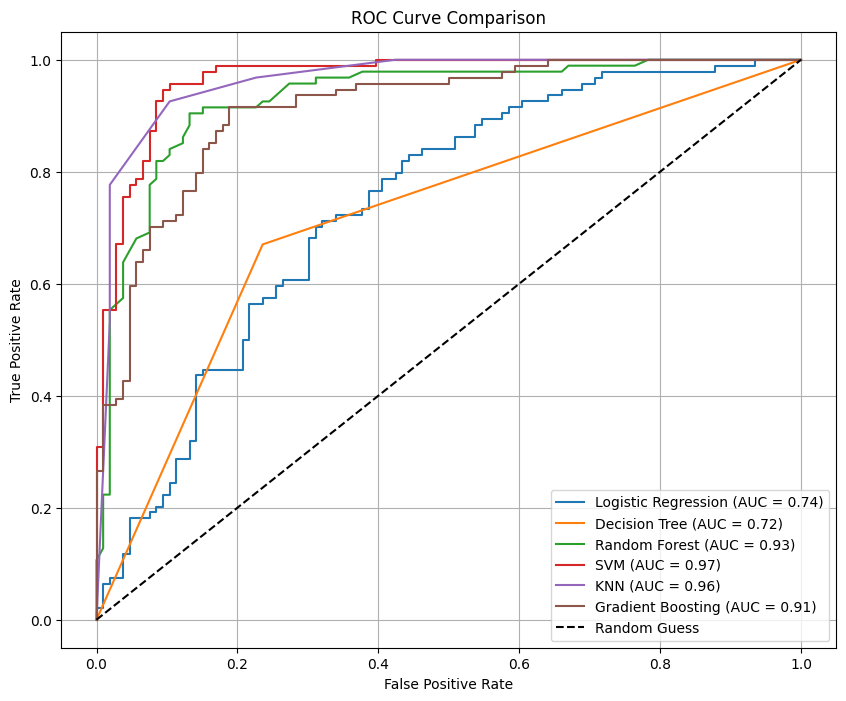

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Initialize models with probability=True for SVM
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),  # Enable probability estimates
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Create a list to store the results for each model
results = []

# Loop through each model, train it, predict, and calculate metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Store results in the list
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Display the comparative analysis
print("Comparative Analysis Results:")
print(results_df)

# Identify the best model based on a chosen metric (e.g., F1-Score or Accuracy)
best_model = results_df.loc[results_df['F1-Score'].idxmax()]
print("\nBest Model based on F1-Score:")
print(best_model)

# Plotting the ROC curve for each model
plt.figure(figsize=(10, 8))

# Loop through each model again to plot the ROC curve
for model_name, model in models.items():
    # Train and predict
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get the probabilities for ROC curve

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Add title and labels
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)

# Show the ROC curve
plt.show()
